#IE 7374 Project - EEG EYE STATE - Group 12

*Abdul Mateen*

*Ishpreet Sethi*

*Nirvaya Deoja*

*Vignesh Sivakumar*


## **Importing Necessary Libaries**

In [594]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
import plotly.express as px


import math
from tqdm import tqdm

from sklearn.model_selection import train_test_split
import random as rnd
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
from numpy.linalg import eigh
from itertools import cycle 
from scipy import stats

import time

color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

warnings.filterwarnings("ignore")

In [595]:
#Converting readable csv file
def datasetReader(filename):

    return np.array(pd.read_csv(filename, header=None), dtype = np.float64)


## **Reading the Dataset**

In [596]:
#Load the dataset
df = pd.read_csv("csv_result-EEG Eye State.csv")

In [597]:
#print dataframe
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


## **Printing the Data Records**

In [598]:
#total columns and rows
print('Number of Rows and Columns in the dataset :', df.shape)

Number of Rows and Columns in the dataset : (14980, 15)


## **Printing the Data Summary**

In [599]:
#Df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0    AF3           14980 non-null  float64
 1    F7            14980 non-null  float64
 2    F3            14980 non-null  float64
 3    FC5           14980 non-null  float64
 4    T7            14980 non-null  float64
 5    P7            14980 non-null  float64
 6    O1            14980 non-null  float64
 7    O2            14980 non-null  float64
 8    P8            14980 non-null  float64
 9    T8            14980 non-null  float64
 10   FC6           14980 non-null  float64
 11   F4            14980 non-null  float64
 12   F8            14980 non-null  float64
 13   AF4           14980 non-null  float64
 14   eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


### **Finding Columns With NA Values**

In [600]:
#finding null values
df.isnull().sum()

 AF3             0
 F7              0
 F3              0
 FC5             0
 T7              0
 P7              0
 O1              0
 O2              0
 P8              0
 T8              0
 FC6             0
 F4              0
 F8              0
 AF4             0
 eyeDetection    0
dtype: int64

## **Plotting Heatmap**

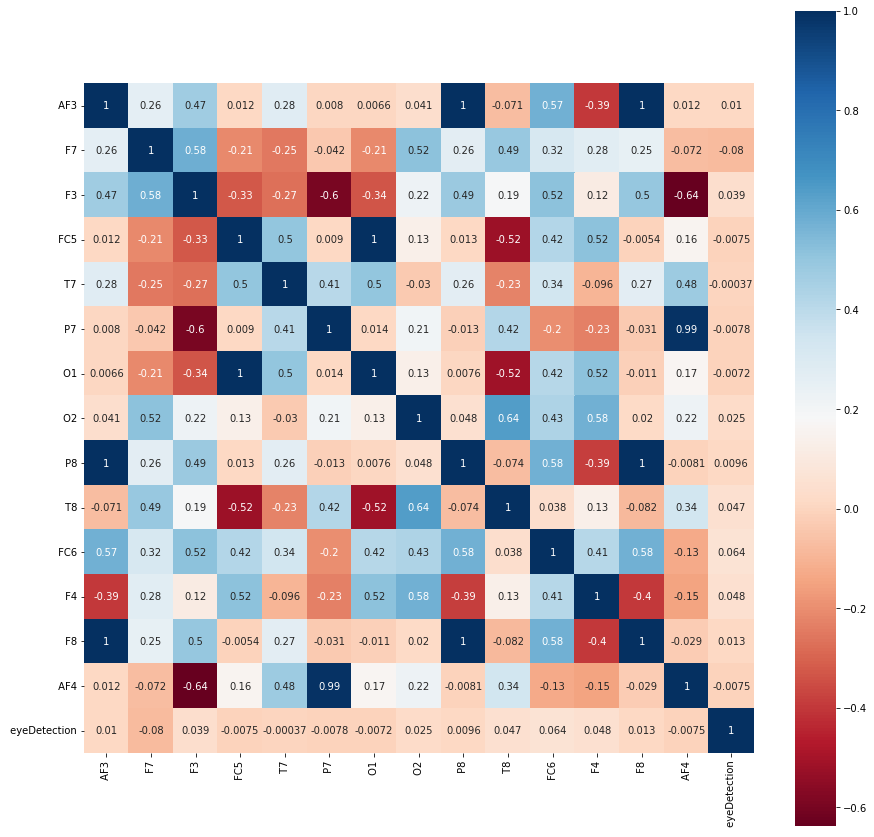

In [601]:
#plotting heat map to check the correlated features
import matplotlib.pyplot as plt
import seaborn as sns  
corr= df.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="RdBu", square=True, ax=ax)

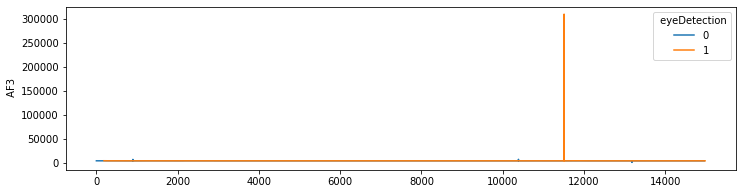

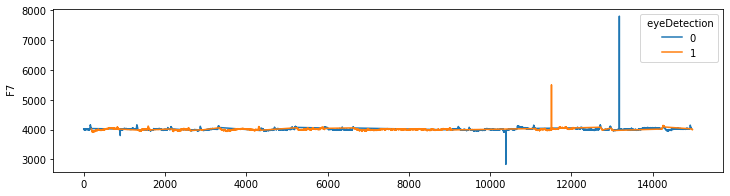

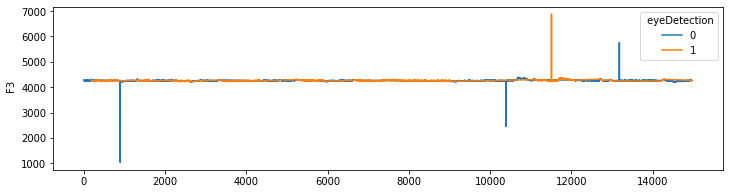

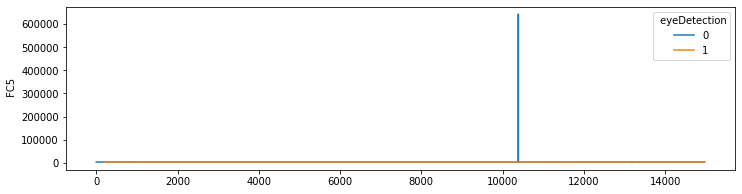

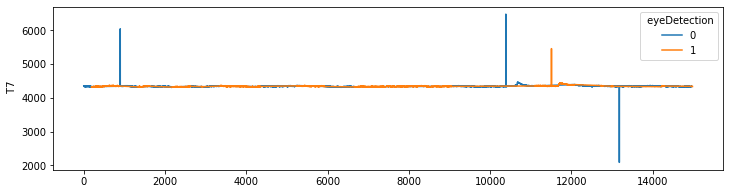

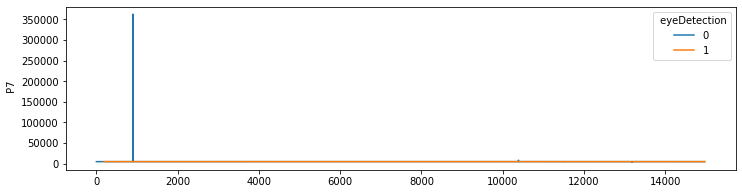

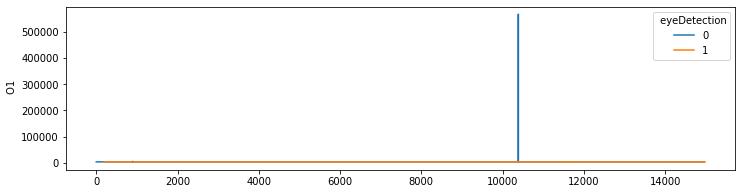

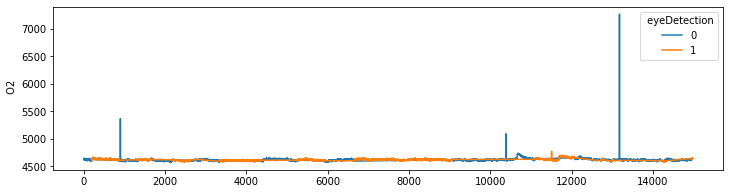

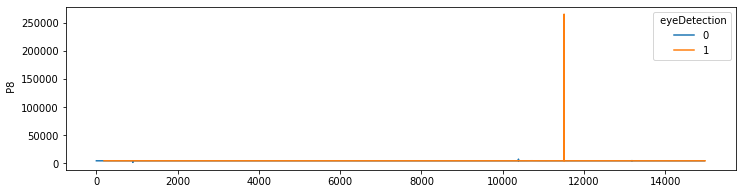

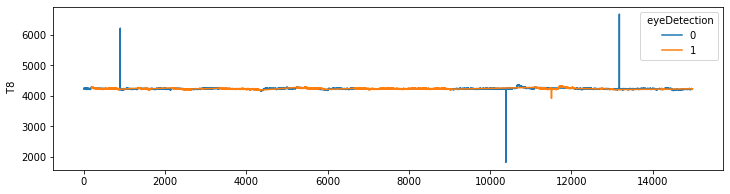

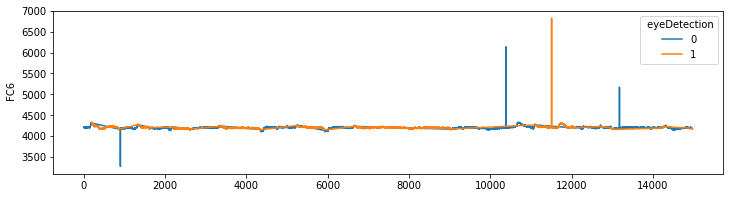

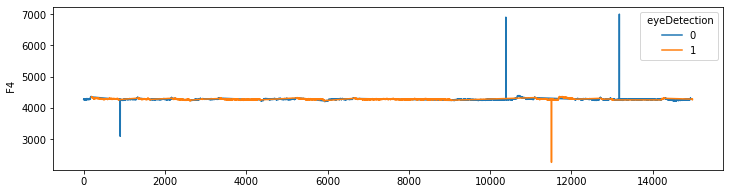

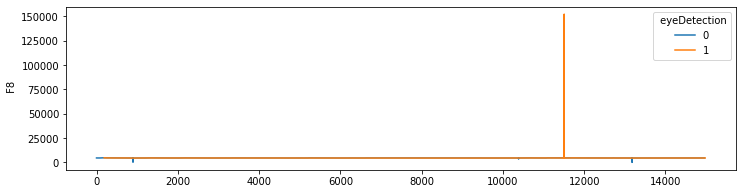

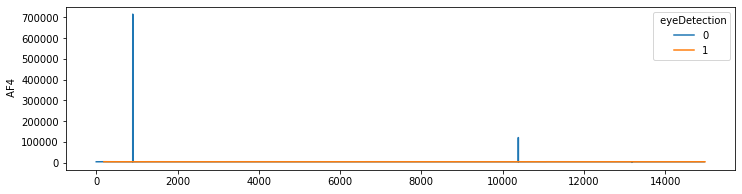

In [602]:
#Time series graph for each feature w.r.t. 'eyeDetection'
df.copy()
for col in df.columns[:-1]:
    plt.figure(figsize=(12, 3))
    sns.lineplot(data = df, x=df.index, y=col, hue=' eyeDetection')
    plt.show()

## **Removing Outliers on the basis of Mean and Standard Deviation**

In [603]:
#understanding and removing highly correlated features

values = df.to_numpy()

for i in range(values.shape[1] - 1):
    # calculate column mean and standard deviation
    df_mean, df_std = np.mean(values[:,i]), np.std(values[:,i])

    # define outlier bounds
    cut_off = df_std * 4
    lower, upper = df_mean - cut_off, df_mean + cut_off
    # remove too small
    too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
    values = np.delete(values, too_small, 0)
    print('>deleted %d rows with small values' % len(too_small))
    # remove too large
    too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
    values = np.delete(values, too_large, 0)
    print('>deleted %d rows with large values' % len(too_large))
# save the results to a new file
np.savetxt('EEG_Eye_State_no_outliers.csv', values, delimiter=',')


>deleted 0 rows with small values
>deleted 1 rows with large values
>deleted 2 rows with small values
>deleted 1 rows with large values
>deleted 0 rows with small values
>deleted 142 rows with large values
>deleted 0 rows with small values
>deleted 48 rows with large values
>deleted 0 rows with small values
>deleted 153 rows with large values
>deleted 0 rows with small values
>deleted 43 rows with large values
>deleted 0 rows with small values
>deleted 0 rows with large values
>deleted 0 rows with small values
>deleted 15 rows with large values
>deleted 0 rows with small values
>deleted 5 rows with large values
>deleted 10 rows with small values
>deleted 0 rows with large values
>deleted 21 rows with small values
>deleted 53 rows with large values
>deleted 0 rows with small values
>deleted 12 rows with large values
>deleted 58 rows with small values
>deleted 53 rows with large values
>deleted 0 rows with small values
>deleted 59 rows with large values


In [604]:
#Creating a new data frame after removing the outliers
df_eye = pd.read_csv("EEG_Eye_State_no_outliers.csv")
df_eye

,4.329229999999999563e+03,4.009230000000000018e+03,4.289229999999999563e+03,4.148210000000000036e+03,4.350260000000000218e+03,4.586149999999999636e+03,4.096920000000000073e+03,4.641029999999999745e+03,4.222050000000000182e+03,4.238460000000000036e+03,4.211279999999999745e+03,4.280510000000000218e+03,4.635899999999999636e+03,4.393850000000000364e+03,0.000000000000000000e+00
0,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0.0
1,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0.0
2,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0.0
3,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0.0
4,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14298,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1.0
14299,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1.0
14300,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1.0
14301,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1.0


In [605]:
df_eye.columns = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4','eyeDetection']

In [606]:
df_eye

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0.0
1,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0.0
2,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0.0
3,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0.0
4,4321.03,4004.62,4284.10,4153.33,4345.64,4587.18,4093.33,4616.92,4202.56,4232.82,4209.74,4281.03,4628.21,4389.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14298,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1.0
14299,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1.0
14300,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1.0
14301,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1.0


In [607]:
df_eye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14303 entries, 0 to 14302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14303 non-null  float64
 1   F7            14303 non-null  float64
 2   F3            14303 non-null  float64
 3   FC5           14303 non-null  float64
 4   T7            14303 non-null  float64
 5   P7            14303 non-null  float64
 6   O1            14303 non-null  float64
 7   O2            14303 non-null  float64
 8   P8            14303 non-null  float64
 9   T8            14303 non-null  float64
 10  FC6           14303 non-null  float64
 11  F4            14303 non-null  float64
 12  F8            14303 non-null  float64
 13  AF4           14303 non-null  float64
 14  eyeDetection  14303 non-null  float64
dtypes: float64(15)
memory usage: 1.6 MB


In [608]:
#Stats for new data frame
df_eye.describe().T

,count,mean,std,min,25%,50%,75%,max
AF3,14303.0,4298.142356,32.384394,4198.97,4280.51,4293.33,4308.72,4466.15
F7,14303.0,4007.199826,27.224240,3913.33,3990.26,4004.62,4020.51,4154.36
F3,14303.0,4261.654456,16.218793,4197.44,4250.26,4262.05,4268.72,4349.23
FC5,14303.0,4120.174694,16.904340,4067.18,4107.69,4120.00,4128.72,4191.79
T7,14303.0,4339.672742,11.994745,4308.72,4331.79,4338.46,4346.15,4397.95
P7,14303.0,4618.168219,12.921663,4566.15,4611.79,4617.44,4625.64,4672.31
O1,14303.0,4070.975570,17.707819,4026.15,4057.44,4069.74,4082.56,4138.97
O2,14303.0,4614.059088,14.397502,4567.18,4604.62,4613.33,4623.08,4672.82
P8,14303.0,4199.640392,13.807438,4147.69,4190.77,4199.49,4208.21,4255.90
T8,14303.0,4229.290880,15.006479,4170.26,4220.00,4228.72,4238.46,4288.21


## **Removing Highly Correlated Columns/Features**

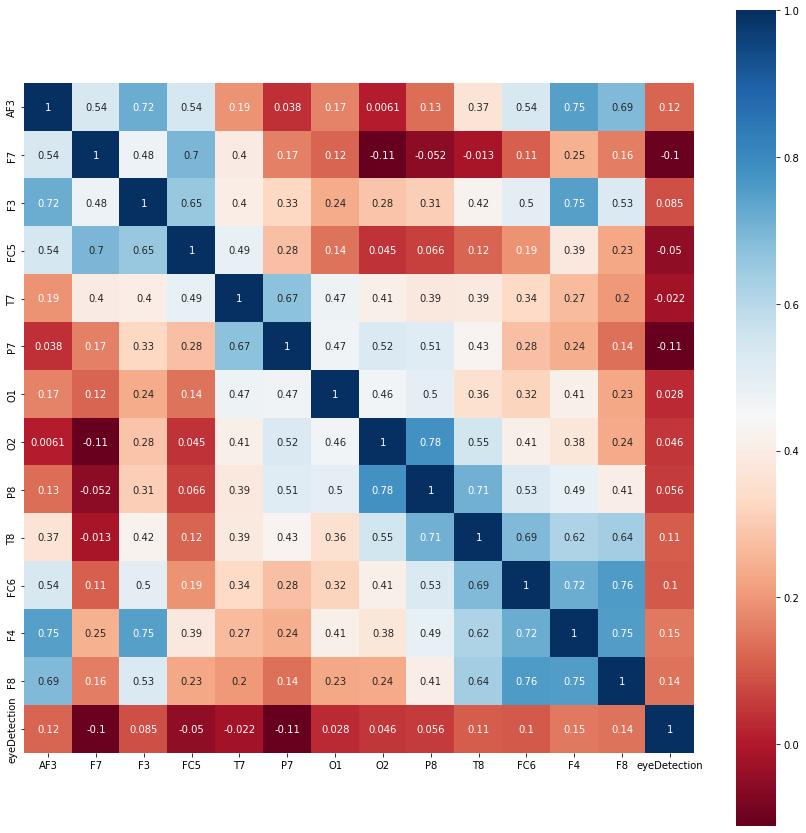

In [609]:
#removed highly correlated columns/features
df_eye_sub = df_eye.drop('AF4', axis=1)

# df_eye_sub= df_eye.iloc[:,[1,2,4,6,7,9,10,11,12,13,14]]
corr= df_eye_sub.corr()
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap="RdBu", square=True, ax=ax)

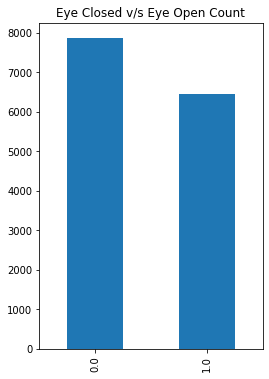

In [610]:
#Bargraph to display count of Closed and open Eyes 
df_eye['eyeDetection'].value_counts().plot(kind = 'bar', figsize=(4,6), title='Eye Closed v/s Eye Open Count')

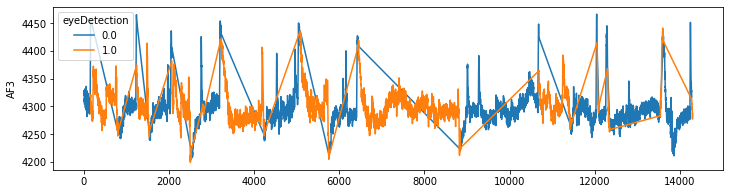

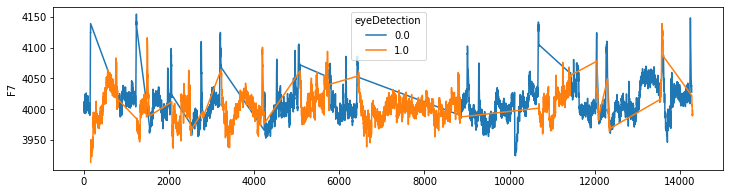

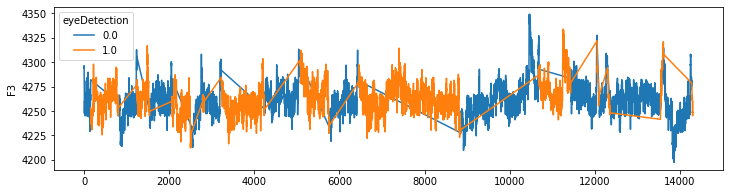

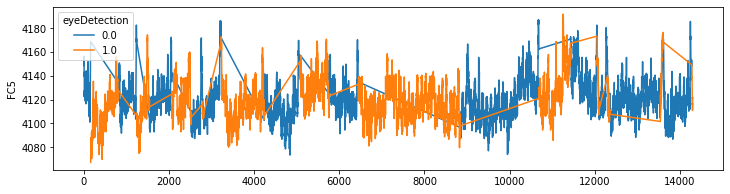

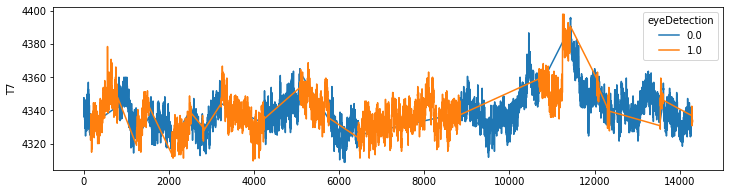

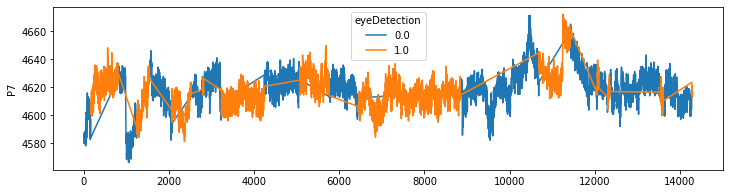

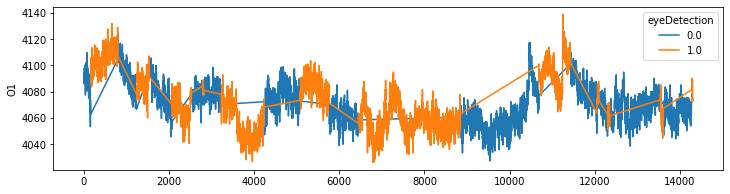

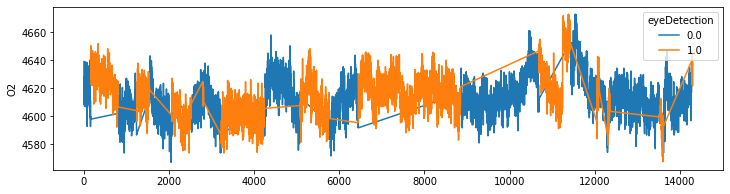

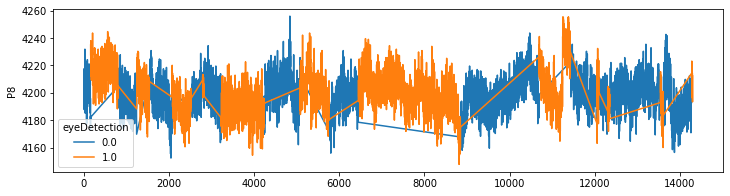

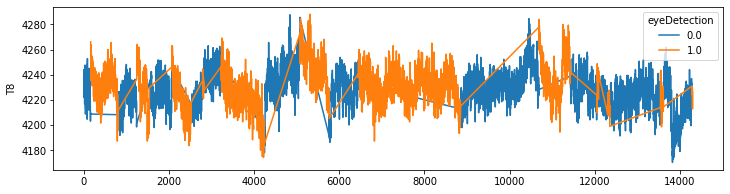

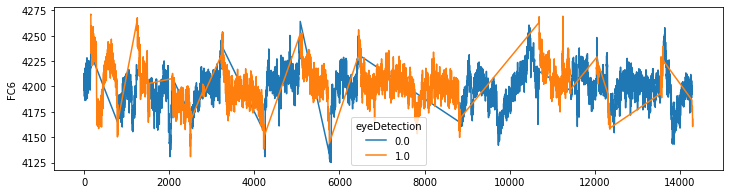

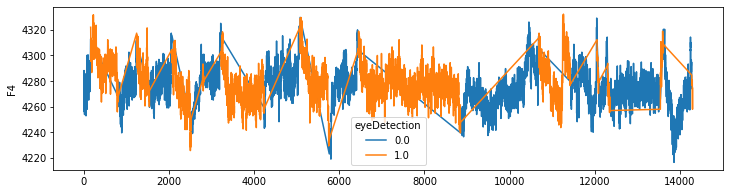

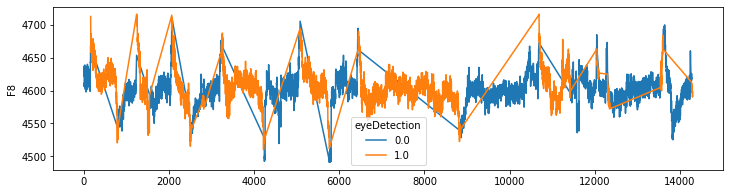

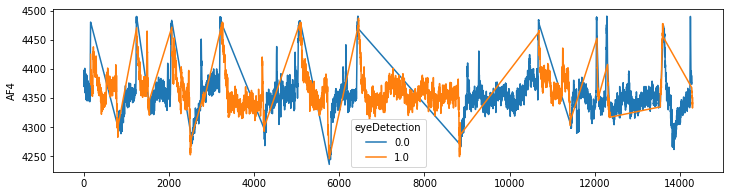

In [611]:
#Time series graph for each feature w.r.t. 'eyeDetection' after removing outliers
df_eye.copy()
for col in df_eye.columns[:-1]:
    plt.figure(figsize=(12, 3))
    sns.lineplot(data = df_eye, x=df_eye.index, y=col, hue='eyeDetection')
    plt.show()
  

In [612]:
#Defining function to calculate metrics inorder to evaluate models
def evaluate(y, y_hat):

      y = (y == 1)
      y_hat = (y_hat == 1)
      accuracy = (y == y_hat).sum() / y.size
      recall = (y & y_hat).sum()/ y.sum()
      precision = (y & y_hat).sum()/ y_hat.sum()

      f_score = 2*(precision * recall)/(precision+recall)  
      print(confusion_matrix(y, y_hat))     
      return accuracy, recall, precision, f_score 

# **DATA PREPARATION**

In [613]:
#Splitting Train and Test data for Machine Learning Models
class DataPrep:
    
    def __init__(self, X, y, indexes = [], remove = False) -> None:
      self.X = X
      self.y = y
      self.remove = remove
      self.indexes = indexes
        
       
    def dataSplit(self):

      X_train, X_test, y_train, y_test = train_test_split(self.X, self.y,
                                                          test_size = 0.3, random_state = 35)
      return X_train, X_test, y_train, y_test

    #Normalize test data using parameters from training dataset
    def normalizeTestData(self, X, mean, std):

      X_norm = (X - mean)/std
      # X_norm = self.add_X0(X_norm)
      return X_norm
      
    def normalize(self, X):

      mean = np.mean(X,0)
      std = np.std(X,0)

      X_norm = (X - mean)/std
      #X_norm = self.add_X0(X_norm)
      return X_norm, mean, std

    def fit(self):

      X_train, X_test, y_train, y_test = self.dataSplit()

      X_train, mean, std = self.normalize(X_train)
      X_test = self.normalizeTestData(X_test, mean, std)

      return X_train, X_test, y_train, y_test

# **Principal Component Analysis (PCA)**



In [614]:
class PCA:
    
    def __init__(self, X_train, X_test) -> None:
        self.X_train = X_train
        self.X_test = X_test


    def plot(self):

      # Taking mean of the training data, centering the data for xtrain and xtest
        self.X_train_meaned = self.X_train - np.mean(self.X_train , axis = 0)
        self.X_test_meaned = self.X_test - np.mean(self.X_train , axis = 0)

      # Determining the covariance matrix
        cov_matrix_train = np.cov(self.X_train_meaned, rowvar = False)
        cov_matrix_test = np.cov(self.X_test_meaned, rowvar = False)

      # Determining the eigenvalues and eigenvectors
        self.egnvaluestr, self.egnvectorstr = np.linalg.eigh(cov_matrix_train)
        self.egnvaluestrn, self.egnvectorstrn = np.linalg.eigh(cov_matrix_test)

      # Determining explained variance
        total_egnvalues = sum(self.egnvaluestr)
        egn_sort = sorted(self.egnvaluestr, reverse=True)

        var_exp = [(i/total_egnvalues) for i in egn_sort]

      # Ploting the explained variance against cumulative explained variance
        cum_sum_exp = np.cumsum(var_exp)
        print(cum_sum_exp)

        plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', 
                label='Individual explained variance')
        plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',
                 label='Cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal component index')
        plt.legend(loc='best')
        plt.tight_layout()
        plt.show()

        
    def fit(self, num_components):
        sorted_index_tr = np.argsort(self.egnvaluestr)[::-1]
        sorted_eigenvalue_tr = self.egnvaluestr[sorted_index_tr]
        sorted_eigenvectors_tr = self.egnvectorstr[:,sorted_index_tr]
        eigenvector_subset_tr = sorted_eigenvectors_tr[:,0:num_components]

        X_reduced_train = np.dot(eigenvector_subset_tr.transpose() , self.X_train_meaned.transpose() ).transpose()

        sorted_index_tn = np.argsort(self.egnvaluestrn)[::-1]
        sorted_eigenvalue_tn = self.egnvaluestrn[sorted_index_tn]
        sorted_eigenvectors_tn = self.egnvectorstrn[:,sorted_index_tn]
        eigenvector_subset_tn = sorted_eigenvectors_tn[:,0:num_components]

        X_reduced_test = np.dot(eigenvector_subset_tr.transpose() , self.X_test_meaned.transpose() ).transpose()

        return X_reduced_train, X_reduced_test


In [615]:
X,y =df_eye_sub.values[:,0:-1],df_eye_sub.values[:,-1]

In [616]:
X_train, X_test, y_train, y_test = DataPrep(X, y).fit()

In [617]:
pca = PCA(X_train, X_test)

[0.4412518  0.63122709 0.76668663 0.81631828 0.86021632 0.89109765
 0.91510752 0.93645773 0.95312364 0.96922921 0.98103435 0.99128107
 1.        ]


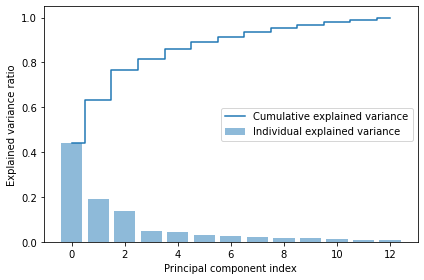

In [618]:
pca.plot()

In [619]:
X_train_pca, X_test_pca = pca.fit(2)

# **Logistic Regression**

In [620]:
#Initialising train and test data for Logistic Regression
class LogisticRegression:
    def __init__(self, X_train, X_test, y_train, y_test, learningRate, tolerance, maxIteration) -> None:
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
      
    
 #Applying Sigmoid Function
    def sigmoid(self, z):
        sig = 1 / (1 + np.exp(-z))
        return sig

    def costFunction(self, X, y, i):
        sig = self.sigmoid(X.dot(self.w))

        #approach 1
        if i == 1:
            cost = (y * np.log(sig) + (1-y)*np.log(1-sig)).sum()
            cost = -cost/X.shape[0]
        else:
        #approach 2
            cost = np.log(np.ones(X.shape[0]) + 
                          np.exp(X.dot(self.w))) - X.dot(self.w)*y
            cost = cost.sum()
        return cost

#applying gradient descent 
    def gradient(self, X,y):
        sig = self.sigmoid(X.dot(self.w))
        gradient = (sig - y).dot(X)
        return gradient

    def gradientDescent(self, X, y):
        errors_list = []
        last_error = float('inf')

        for i in tqdm(range(self.maxIteration)):
            #learning rate decay function
            learningRate = self.learningRate/(1+i*2)
            
            self.w = self.w - self.learningRate* self.gradient(X,y)

            current_error = self.costFunction(X,y, 2)
            diff = last_error - current_error
            last_error = current_error
            errors_list.append(current_error)

            if np.abs(diff) < self.tolerance:
                print('Model has stopped learning')
                break
        
        self.error_plot(errors_list)

        return

    def predict(self, X):
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)

    def fit(self):
        self.w = np.ones(self.X_train.shape[1], dtype = np.float64)*0

        self.gradientDescent(self.X_train, self.y_train)
        print(self.w)

        y_train_hat = self.predict(self.X_train)
        

  #print f1_score, Recall, Precision, Accuracy for train data set   
        f_score_lr, recall_lr, precision_lr, self.accuracy_lr = evaluate(self.y_train, y_train_hat)
       
        print('F score of training data {} '.format(f_score_lr))
        print('Recall of training data {}'.format(recall_lr))
        print('Precision of training data {}'.format(precision_lr))
        print('Accuracy of training data {}'.format(self.accuracy_lr))
        
        self.y_test_hat = self.predict(self.X_test)

  #print f1_score, Recall, Precision, Accuracy for test data set 
        f_score_lr_test, recall_lr_test, precision_lr_test, self.accuracy_lr_test = evaluate(self.y_test, self.y_test_hat)
        print('F score of test data {} '.format(f_score_lr_test))
        print('Recall of test data {}'.format(recall_lr_test))
        print('Precision of test data {}'.format(precision_lr_test))
        print('Accuracy of test data {}'.format(self.accuracy_lr_test))

     


    def get(self):
        return self.accuracy_lr, self.accuracy_lr_test

    def error_plot(self, errors_list):
        
        
        y_axis = errors_list
        x_axis = list(range(0,len(errors_list)))

            
        fig, ax = plt.subplots()
        ax.plot(x_axis,y_axis)
            
        ax.set (xlabel = 'Iterations', ylabel = 'Error')
        plt.show()

In [621]:
X,y =df_eye_sub.values[:,0:-1],df_eye_sub.values[:,-1]

In [622]:
X_train, X_test, y_train, y_test = DataPrep(X, y).fit()

In [623]:
reg = LogisticRegression(X_train, X_test, y_train, y_test, learningRate = 0.00001, tolerance = 0.000001, maxIteration = 15000)

 13%|█▎        | 1924/15000 [00:04<00:32, 401.38it/s]


Model has stopped learning


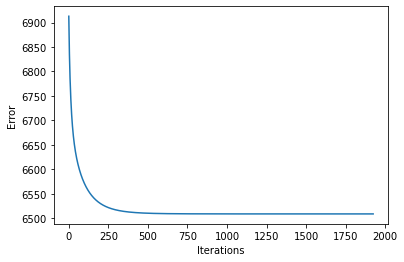

[ 0.29805041 -0.44990734  0.21274998 -0.23385589  0.3851646  -0.48884564
  0.04234164  0.03046498 -0.00501622  0.03425048 -0.1607565   0.16807285
  0.09434729]
[[3387 2121]
 [1718 2786]]
F score of training data 0.6165601278465841 
Recall of training data 0.6185612788632326
Precision of training data 0.5677603423680456
Accuracy of training data 0.5920731059398575
[[1462  884]
 [ 729 1216]]
F score of test data 0.6240969470985784 
Recall of test data 0.6251928020565553
Precision of test data 0.579047619047619
Accuracy of test data 0.6012360939431398
Completed in 5.06782259499596


In [624]:
startlr = time.perf_counter()
reg.fit()
endlr = time.perf_counter()

print('Completed in', endlr - startlr)
lr_timer = endlr - startlr

In [625]:
accuracy_lr ,accuracy_lr_test = reg.get()
#print(accuracy_lr,accuracy_lr_test)

## Plotting ROC/AUC

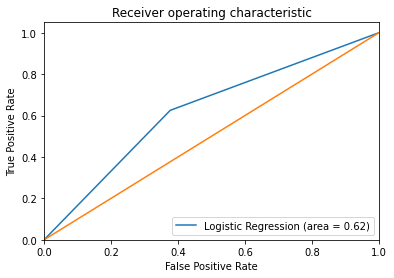

In [626]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, reg.predict(X_test)[:])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **(Gaussian) Naive Bayes**

In [627]:
#Defining Gaussian Naive Bayes class
class GaussianNaiveBayes:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    def distribution(self, data):
        mean = np.mean(data)
        std = np.std(data)
        dist = norm(mean, std)
        
        return dist

    def probability(self, X, prior, probfor):
        prob = prior
        if probfor == 0:
            for i in range(self.X0_train.shape[1]):
                prob *= self.dist_X0[i].pdf(X[i])
        else:
            for i in range(self.X1_train.shape[1]):
                prob *= self.dist_X1[i].pdf(X[i])
        return prob

    def fit(self):
        
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]

        self.prior0 = len(self.X0_train)/len(self.X_train)
        self.prior1 = len(self.X1_train)/len(self.X_train)

        self.dist_X0 = dict()
        self.dist_X1 = dict()

        for i in range(self.X0_train.shape[1]):
            
            self.dist_X0[i] = self.distribution(self.X0_train[i])
            self.dist_X1[i] = self.distribution(self.X1_train[i])
      
    def predict(self):
        self.predictions = []
        for sample, target in zip(self.X_train, self.y_train):
            prob0 = self.probability(sample, self.prior0, 0)
            prob1 = self.probability(sample, self.prior1, 1)

            self.predictions.append(np.argmax([prob0, prob1]))

  #print f1_score, Recall, Precision, Accuracy for train data set 
        f_score_nb, recall_nb, precision_nb, self.accuracy_nb = evaluate(self.y_train, np.array(self.predictions))
        print('For Training Data')
        print('F1 score of train data {}'.format(f_score_nb))
        print('Recall of train data {}'.format(recall_nb))
        print('Precision of train data {}'.format(precision_nb))
        print('Accuracy of train data {}'.format(self.accuracy_nb))
        
        self.predictions = []
        for sample, target in zip(self.X_test, self.y_test):
            prob0 = self.probability(sample, self.prior0, 0)
            prob1 = self.probability(sample, self.prior1, 1)

            self.predictions.append(np.argmax([prob0, prob1]))

  #print f1_score, Recall, Precision, Accuracy for train test set 
        f_score_nb_test, recall_nb_test, precision_nb_test, self.accuracy_nb_test = evaluate(self.y_test, np.array(self.predictions))
        print('For Test Data')
        print('F1 score of test data {}'.format(f_score_nb_test))
        print('Recall of test data {}'.format(recall_nb_test))
        print('Precision of test data {}'.format(precision_nb_test))
        print('Accuracy of test data {}'.format(self.accuracy_nb_test))


    def get(self):
        
        return self.accuracy_nb, self.accuracy_nb_test

   
    def get1(self):
        
        return self.accuracy_nb, self.accuracy_nb_test

In [628]:
nb = GaussianNaiveBayes(X_train, y_train, X_test, y_test)

In [629]:
#Start runtime
startnb = time.perf_counter()

nb.fit()
nb.predict()

#End runtime
endnb = time.perf_counter()
print('Completed in', endnb - startnb)
nb_timer = endnb - startnb

[[2306 3202]
 [2351 2153]]
For Training Data
F1 score of train data 0.4453655613264083
Recall of train data 0.4780195381882771
Precision of train data 0.4020541549953315
Accuracy of train data 0.43675829191601584
[[ 987 1359]
 [1049  896]]
For Test Data
F1 score of test data 0.43882544861337686
Recall of test data 0.46066838046272496
Precision of test data 0.3973392461197339
Accuracy of test data 0.4266666666666667
Completed in 73.45142048799607


In [630]:
#Naive Bayes accuracy on test data set
accuracy_nb ,accuracy_nb_test = nb.get()
#print(accuracy_nb,accuracy_nb_test)

In [ ]:
#Start runtime
startnbpcaall = time.perf_counter()

for i in range(2,12):
    
    X_train_pca, X_test_pca = pca.fit(i)
    nb_pca = GaussianNaiveBayes(X_train_pca, y_train, X_test_pca, y_test)
    nb_pca.fit()
    print('Prediction of Gaussian Naive bayes based on {} principal components'.format(i))
    nb_pca.predict()

#End runtime
endnbpcaall = time.perf_counter()
print('Completed in', endnbpcaall - startnbpcaall)
nbpca_timerall = endnbpcaall - startnbpcaall

Prediction of Gaussian Naive bayes based on 2 principal components
[[3567 1941]
 [2550 1954]]
For Training Data
F1 score of train data 0.5514382740711147
Recall of train data 0.43383658969804617
Precision of train data 0.5016688061617458
Accuracy of train data 0.46529348731991904
[[1570  776]
 [1130  815]]
For Test Data
F1 score of test data 0.5558144954556048
Recall of test data 0.4190231362467866
Precision of test data 0.5122564424890006
Accuracy of test data 0.46097285067873295
Prediction of Gaussian Naive bayes based on 3 principal components
[[4069 1439]
 [3127 1377]]
For Training Data
F1 score of train data 0.5439472632840592
Recall of train data 0.30572824156305506
Precision of train data 0.4889914772727273
Accuracy of train data 0.3762295081967213
[[1772  574]
 [1378  567]]
For Test Data
F1 score of test data 0.545094383593568
Recall of test data 0.2915167095115681
Precision of test data 0.49693251533742333
Accuracy of test data 0.3674659753726507
Prediction of Gaussian Naive b

In [632]:
#Start runtime
startnbpca = time.perf_counter()

X_train_pca, X_test_pca = pca.fit(5)
nb_pca = GaussianNaiveBayes(X_train_pca, y_train, X_test_pca, y_test)
nb_pca.fit()
nb_pca.predict()

#End runtime
endnbpca = time.perf_counter()
print('Completed in', endnbpca - startnbpca)
nbpca_timer = endnbpca - startnbpca

[[2518 2990]
 [1689 2815]]
For Training Data
F1 score of train data 0.5326608070315622
Recall of train data 0.625
Precision of train data 0.48492678725236865
Accuracy of train data 0.5461247453681249
[[1112 1234]
 [ 724 1221]]
For Test Data
F1 score of test data 0.5436961081333023
Recall of test data 0.6277634961439589
Precision of test data 0.4973523421588595
Accuracy of test data 0.555
Completed in 27.713668876996962


In [633]:
accuracy_nbpca ,accuracy_nbpca_test = nb_pca.get1()
#print(accuracy_nbpca,accuracy_nbpca_test)

# K-Nearest Neighbour

In [634]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance(Changed p1 and p2 to d1 and d2)
def eucledian(d1,d2):
    dis = np.sqrt(np.sum((d1-d2)**2))
    return dis
 
#Function to calculate KNN
def predictKNN(X_train, y , X_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in X_input: 
         
        #Array to store distances
        ##changed point_dist to p_dist
        p_dist = []
         
        #Loop through each training Data
        for j in range(len(X_train)): 
            distances = eucledian(np.array(X_train[j,:]) , item) 
            #Calculating the distance
            p_dist.append(distances) 
        p_dist = np.array(p_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(p_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [635]:
#start runtime
startknn = time.perf_counter()

from numpy.random import randint
 
#Creating the training Data
idx = randint(0,150,1000)
X_train_sam = X_train[idx]
y_train_sam = y_train[idx]

idx = randint(0,150,300)
X_test_sam = X_test[idx]
y_test_sam = y_test[idx]
 
#Applying our function 
y_pred = predictKNN(X_train_sam,y_train_sam,X_test_sam , 9)

f_score_knn_test, recall_knn_test, precision_knn_test, accuracy_knn_test = evaluate(y_test_sam, np.array(y_pred).astype('int64'))
print('F1 score of test data {}'.format(f_score_knn_test))
print('Recall of test data {}'.format(recall_knn_test))
print('Precision of test data {}'.format(precision_knn_test))
print('Accuracy of test data {}'.format(accuracy_knn_test))


#End runtime
endknn = time.perf_counter()
print('Completed in', endknn - startknn)
knn_timer = endknn - startknn

[[116  42]
 [ 36 106]]
F1 score of test data 0.74
Recall of test data 0.7464788732394366
Precision of test data 0.7162162162162162
Accuracy of test data 0.7310344827586208
Completed in 3.9753466059992206


# Neural Network

In [636]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

## Build neural network


In [637]:
#Defining our sequential model
nn = Sequential()

#adding dense layers
nn.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(1))

#checking model summary
nn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                896       
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dense_31 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,521
Trainable params: 3,521
Non-trainable params: 0
_________________________________________________________________


## Compile Model


In [638]:
nn.compile(optimizer='adam',loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

## Train Model

In [639]:
#Start runtime
startnn = time.perf_counter()

EPOCHS = 10
BATCH_SIZE = 10
history = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)

#End runtime
endnn = time.perf_counter()
print('Completed in', endnn - startnn)
nn_timer = endnn - startnn

Epoch 1/10
1002/1002 [==============================] - 4s 3ms/step - loss: 0.4877 - accuracy: 0.7407 - val_loss: 0.3808 - val_accuracy: 0.8077
Epoch 2/10
1002/1002 [==============================] - 3s 3ms/step - loss: 0.3198 - accuracy: 0.8562 - val_loss: 0.2876 - val_accuracy: 0.8695
Epoch 3/10
1002/1002 [==============================] - 3s 3ms/step - loss: 0.2611 - accuracy: 0.8847 - val_loss: 0.2417 - val_accuracy: 0.8949
Epoch 4/10
1002/1002 [==============================] - 3s 3ms/step - loss: 0.2209 - accuracy: 0.9035 - val_loss: 0.2121 - val_accuracy: 0.9035
Epoch 5/10
1002/1002 [==============================] - 3s 3ms/step - loss: 0.1945 - accuracy: 0.9171 - val_loss: 0.1939 - val_accuracy: 0.9203
Epoch 6/10
1002/1002 [==============================] - 3s 3ms/step - loss: 0.1773 - accuracy: 0.9245 - val_loss: 0.1978 - val_accuracy: 0.9175
Epoch 7/10
1002/1002 [==============================] - 3s 3ms/step - loss: 0.1624 - accuracy: 0.9323 - val_loss: 0.1912 - val_accuracy:

## Plotting epoch vs accuracy/loss

In [ ]:
#Plotting model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#finding max train accuracy 
nn_accuracy = max(history.history['accuracy'])
#nn_accuracy

In [ ]:
#finding max validation accuracy 
nn_accuracy_test = max(history.history['val_accuracy'])
#nn_accuracy_test

# **Bonus Model** 
## Support Vector Machine(SVM)

In [ ]:
#Defining class for SVM 
class SVM():
    def __init__(self, max_iter=100, C=1.0, epsilon=0.001):
        self.max_iter = max_iter
        self.C = C
        self.epsilon = epsilon
   
    def fit(self, X, y):
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = -2 * self.kernel(x_i, x_j) + self.kernel(x_i, x_i) + self.kernel(x_j, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])
            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break
            #print(count)
            if count >= self.max_iter:
                print("The max of %d iterations has been reached" % (self.max_iter))
                self.support_vectors = X[np.where(alpha > 0)[0], :]
                return
        self.b = self.calc_b(X, y, self.w)
        self.w = self.calc_w(alpha, y, X)

        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        self.support_vectors = X[alpha_idx, :]
        return self.support_vectors, count
    def getsupportvectors(self):
        return self.support_vectors
    def predict(self, X):
        return self.h(X, self.w, self.b)
    def getcoeffintercept(self):
        return self.w, self.b
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i
    def kernel(self, x1, x2):
        return np.dot(x1, x2.T)
    def predict_proba(self, X):
        return np.dot(self.w.T, X.T) + self.b

In [ ]:
#start runtime
startsvm = time.perf_counter()


model = SVM(max_iter=3, C=1.0, epsilon=0.00001)
y_train_svm = []
y_test_svm = []
for i in range(len(y_train)):
    if(y_train[i] == 0):
      y_train_svm.append(-1)
    else:
      y_train_svm.append(1)

for i in range(len(y_test)):
    if(y_train[i] == 0):
      y_test_svm.append(-1)
    else:
      y_test_svm.append(1)

y_train_svm = np.asarray(y_train_svm)
y_test_svm = np.asarray(y_test_svm)

model.fit(X_train, y_train_svm)

 #print f1_score, Recall, Precision, Accuracy for train train set
Y_predicted = [model.predict(x) for x in X_train]
f_score_svm, recall_svm, precision_svm, accuracy_svm = evaluate(y_train_svm, np.array(Y_predicted))
print('F1 score of train data {}'.format(f_score_svm))
print('Recall of train data {}'.format(recall_svm))
print('Precision of train data {}'.format(precision_svm))
print('Accuracy of train data {}'.format(accuracy_svm))

 #print f1_score, Recall, Precision, Accuracy for train test set
Y_predicted = [model.predict(x) for x in X_test]
f_score_svm_test, recall_svm_test, precision_svm_test, accuracy_svm_test = evaluate(y_test_svm, np.array(Y_predicted))
print('F1 score of test data {}'.format(f_score_svm_test))
print('Recall of test data {}'.format(recall_svm_test))
print('Precision of test data {}'.format(precision_svm_test))
print('Accuracy of test data {}'.format(accuracy_svm_test))

endsvm = time.perf_counter()

print('Completed in', endsvm - startsvm)
svm_timer = endsvm - startsvm

## Model comparison based on Train Accuracy

In [ ]:
models = pd.DataFrame({
    'Model' : ['GNB', 'GNB with PCA', 'Logistic Regression', 'SVM', 'Neural Network'],
    'Accuracy_train' :  [accuracy_nb, accuracy_nbpca, accuracy_lr, accuracy_svm, nn_accuracy]

})

models.sort_values(by = 'Accuracy_train', ascending = False)
px.bar(data_frame = models, y = 'Accuracy_train', x = 'Model',
       color = 'Accuracy_train',color_continuous_scale='haline',
       template = 'plotly_dark', title = 'Accuracy Comparison on Train data for each Machine Learning Model').update_yaxes(categoryorder="total descending")

## Model comparison based on Test Accuracy

In [ ]:
models = pd.DataFrame({
     'Model' : ['GNB', 'SVM', 'GNB with PCA', 'Logistic Regression','KNN', 'Neural Network'],
     'Accuracy_test' :  [accuracy_nb_test, accuracy_svm_test, accuracy_nbpca_test, accuracy_lr_test, accuracy_knn_test, nn_accuracy_test],

})

models.sort_values(by = 'Accuracy_test', ascending = False)
px.bar(data_frame = models, y = 'Accuracy_test', x = 'Model',
       color = 'Accuracy_test',color_continuous_scale='haline',
       template = 'plotly_dark', title = 'Accuracy Comparison on Test Data for each Machine Learning Model').update_yaxes(categoryorder="total descending")

## Model comparison based on Runtime

In [647]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Logistic Regression', 'SVM', 'GNB with PCA' , 'Neural Network', 'GNB'],
    'Runtime' : [knn_timer, lr_timer, svm_timer, nbpca_timer, nn_timer, nb_timer]
})

models.sort_values(by = 'Runtime', ascending = False)
px.bar(data_frame = models, y = 'Runtime', x = 'Model',
       color = 'Runtime',color_continuous_scale='haline',
       template = 'plotly_dark', title = 'Runtime Comparison for each Machine Learning Model').update_yaxes(categoryorder="total descending")

## Comparing algorithms with sklearn

In [648]:
# Compare Algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
array = df_eye_sub.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NN', MLPClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state= seed, shuffle = True)
	cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	mod = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(mod)


LR: 0.649735 (0.026916)
KNN: 0.912845 (0.010954)
NN: 0.898626 (0.010579)
NB: 0.626427 (0.019575)
SVM: 0.878121 (0.011608)
